In [4]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import os
from data.load_data import load_monk
from src.MetricFunctions import get_metric_instance
from src.MLP import MLP
from src.GridSearch import GridSearch, RandomGridsearch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from src.EarlyStopping import EarlyStopping


Classification

Regression

In [5]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import os
from data.load_data import load_monk
from src.MetricFunctions import get_metric_instance
from src.MLP import MLP
from src.GridSearch import GridSearch, RandomGridsearch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from src.EarlyStopping import EarlyStopping
path = os.getcwd()
file = '/data/ML-CUP22-TR.csv'

labels = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','y1','y2']

TR = pd.read_csv(path + file, sep = ',', header = None, usecols=range(1,12), \
                 names = labels, skiprows = 7)

TR = TR.to_numpy()

np.random.shuffle(TR)

TR = np.split(TR, [9], axis = 1)

X = TR[0]
y_true = TR[1]

print(y_true)
print(X.shape)
print(y_true.shape)

n_epochs = 500

[[ 12.818538 -31.916456]
 [  5.467219 -26.198178]
 [  7.545822 -28.936749]
 ...
 [ 16.083429 -29.646192]
 [ 12.469708 -30.675911]
 [ 19.359347 -27.890531]]
(1485, 9)
(1485, 2)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.1)
params_grid = {
    "eta": [0.35, 0.25, 0.2, 0.15, 0.1],
    "l2": [0.0005, 0.0004, 0.0003, 0.0002, 0.0001],
    "alpha": [0.25, 0.4, 0.5, 0.6, 0.75],
    "minibatch_size": [None, 150]
}

mlp = MLP([10,60], 9, 2, task = "regression", activation_function = "sigmoid")




Early stopped training on epoch 3686
1.5180365987038194


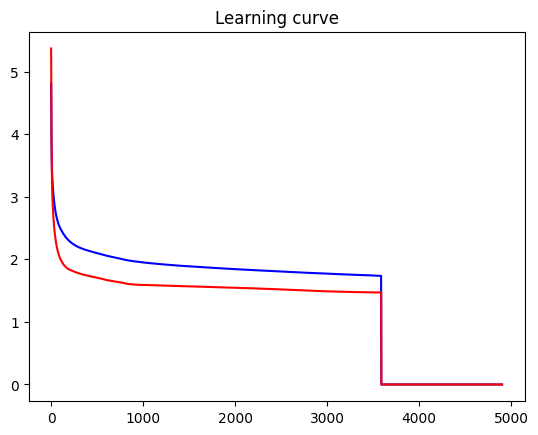

Early stopped training on epoch 1573
1.9603195094842627


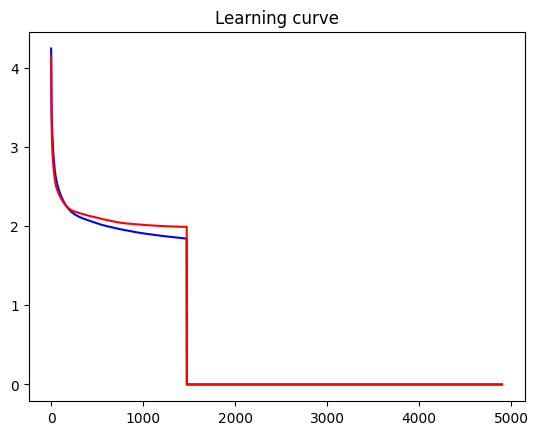

Early stopped training on epoch 1573
1.9603195094842627


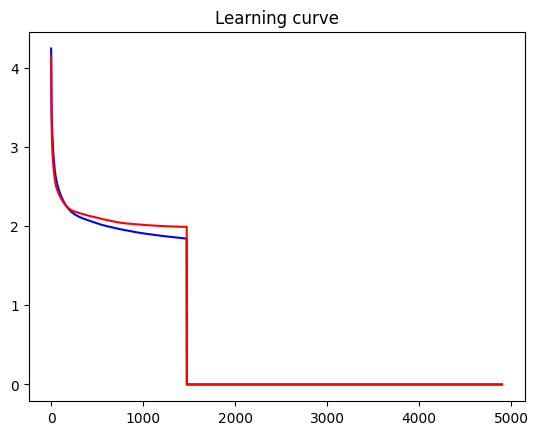

Early stopped training on epoch 1573
1.9603195094842627


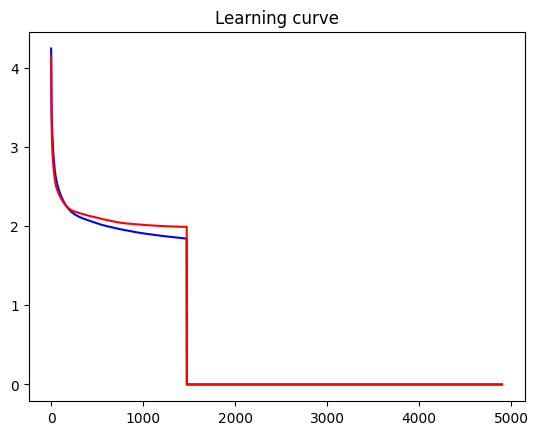

Early stopped training on epoch 1573
1.9603195094842627


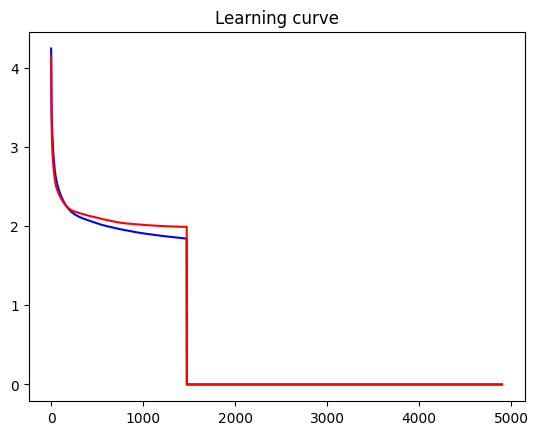

[1.5180365987038194, 1.9603195094842627, 1.9603195094842627, 1.9603195094842627, 1.9603195094842627]
1.8718629273281742


In [7]:
err = []
for i in range(5):
  X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.1)
  # sandardise X_train and X_test
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)
  Parameters =  {'n_epochs': 5000, 'batch_size': 500, 'patience': 4, 'early_stopping': False,
  'Nesterov': False, 'weights_initialization': 'xavier', 'verbose': False, 'step': 0.001, 'momentum': 0.75,
    'regularization': 'no', 'tolerance': 1e-5, 'alpha_l2': 0.2, 'alpha_l1': 0.01}

  mlp = MLP([10,60], 9, 2, task = "regression", activation_function = "relu")

  mlp.fit(X_train, y_train, n_epochs= 5000, batch_size= 500, patience= 50, early_stopping= True,
  Nesterov = False, weights_initialization = 'scaled', verbose = False, step= 0.001, momentum= 0.75,
    regularization = 'no', tolerance= 1e-5, alpha_l2= 0.2, alpha_l1= 0.01)

  #mlp.fit(X_train, y_train, n_epochs = 500, batch_size = 500, error = "MSE", step = 0.1)

  y_pred = mlp.predict(X_test)

  mse = get_metric_instance("mse")
  err.append(mse(y_test, y_pred))
  plt.plot(mlp.learning_curve[100:], color = 'blue')
  plt.plot(mlp.validation_curve[100:], color = 'red')
  plt.title("Learning curve")
  print(mse(y_test, y_pred))
  plt.show()
  plt.close()
print(err)
print(np.mean(err))

1.9603195094842627


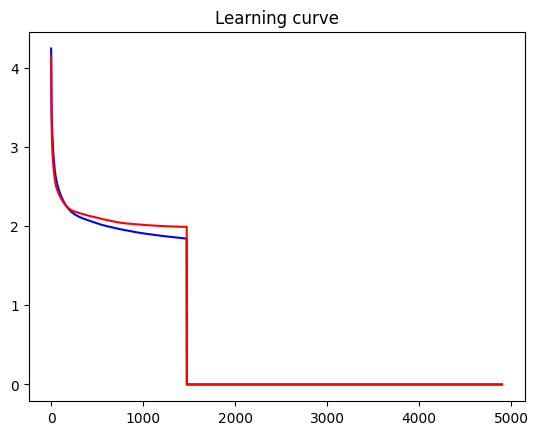

In [8]:
plt.plot(mlp.learning_curve[100:], color = 'blue')
plt.plot(mlp.validation_curve[100:], color = 'red')
plt.title("Learning curve")
print(mse(y_test, y_pred))
plt.show()
plt.close()

Early stopped training on epoch 330
Early stopped training on epoch 89
Early stopped training on epoch 33
Early stopped training on epoch 12


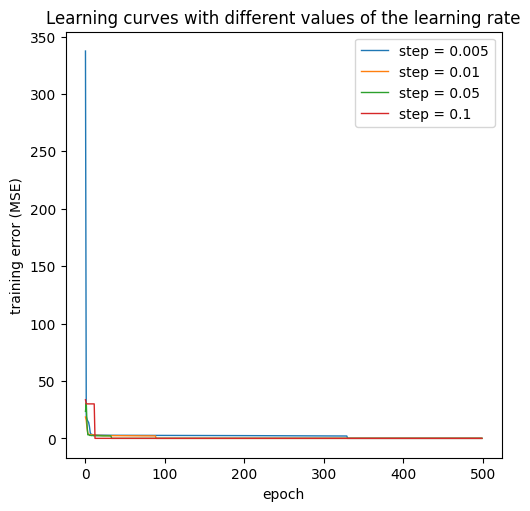

In [9]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')

for step in [0.005, 0.01, 0.05, 0.1]:
    mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 50, step = step)
    ax.plot(range(n_epochs), mlp.learning_curve, label = 'step = ' + str(step), linewidth = 1)

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')  
ax.set_title("Learning curves with different values of the learning rate")  
ax.legend()


Early stopped training on epoch 36


ValueError: x, y, and format string must not be None

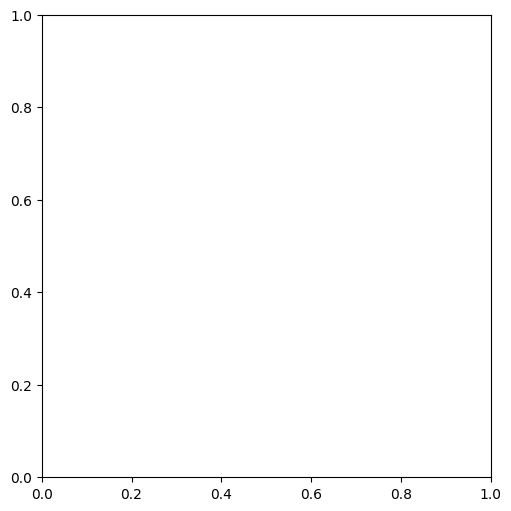

In [10]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
step = 0.1
for alpha_l2 in [0, 0.005, 0.01, 0.05, 0.1]:
    learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 50, step = step, regularization = "L2", alpha_l2 = alpha_l2)
    ax.plot(range(n_epochs), learning_curve, label = 'alpha L2 = ' + str(alpha_l2), linewidth = 1)

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')  
ax.set_title("Learning curves with different regularization")  
ax.legend()

Early stopped training on epoch 14


ValueError: x, y, and format string must not be None

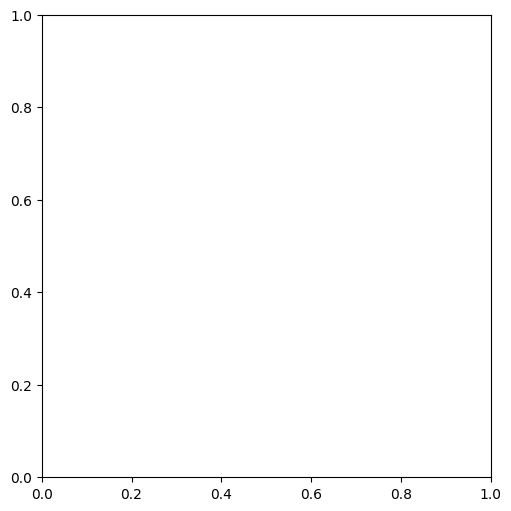

In [12]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
step = 0.5
for momentum in [0, 0.1, 0.3]:
    learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 100, step = step, momentum = momentum)
    ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'momentum = ' + str(momentum))

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')   
ax.set_title("Learning curves with different momentum")  
ax.legend()

Early stopped training on epoch 9


AttributeError: 'EarlyStopping' object has no attribute '_best_params'

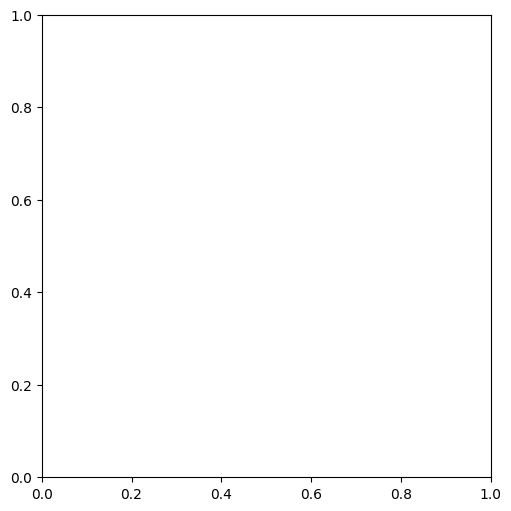

In [13]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
step = 0.1
for batch_size in [1, 100]:
    learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = batch_size, step = step)
    ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'batch_size = ' + str(batch_size))

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')   
ax.set_title("Learning curves with different batch size")  
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
step = 0.5

momentum = 0
learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 100, step = step)
ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'momentum = ' + str(momentum))

momentum = 0.2
learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 100, step = step, momentum = momentum)
ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'momentum = ' + str(momentum))

learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 100, step = step, momentum = momentum, Nesterov = True)
ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'momentum = ' + str(momentum) + ' (Nesterov)')

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')    
ax.legend()

In [ ]:
n_classes = 5
input_size = 5
mlp = MLP([5, 5], input_size, n_classes, task = "classification")